#### Pregunta 3:
## Predicción del Precio de una Casa

(a) Construcción del dataframe, el dataset contiene 14 atributos para describir propiedades, de estos 14 atributos el ultimo es el que desamos predecir (MEDV, valor medio de las viviendas).

atributos:
1. CRIM: tasa de criminalidad per cápita por municipio 
2. ZN: proporción de suelo residencial dividido en zonas para las porciones más de 25.000 pies cuadrados 
3. INDUS: proporción de acres de negocios no minoristas por ciudad 
4. CHAS: Charles River variable ficticia (= 1 si sale del tracto río; 0 en caso contrario) 
5. NOX: la concentración de óxidos de nitrógeno (partes por 10 millones) 
6. RM: promedio número de habitaciones por vivienda 
7. EDAD: proporción de unidades ocupadas por el propietario construyó antes de 1940 
8. DIS: distancias ponderadas a cinco centros de empleo de Boston 
9. RAD: índice de accesibilidad a las autopistas radiales 
10. iMPUESTOS: valor total de impuestos sobre bienes tasa por $ 10,000 
11. PTRATIO: alumno-maestro por ciudad 
12. B: 1000 (Bk - 0,63) ^ 2 donde Bk es la proporción de los negros por ciudad 
13. LSTAT:% de estado inferior de la población 


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Archivo CSV
url = 'DatasetCasa.csv'
#lectura
df = pd.read_csv(url, sep=' ',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#separación entre datos de entrenemiento y datos de prueba
from sklearn.cross_validation import train_test_split
# 25% datos de prueba
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0) 


(b) Normalización de los datos, esto es conveniente debido a que las magnitudes de los atributos son muy variadas y de esta misma forma al inter-relacionar las dimensiones estas no arrastran unidades de medición.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
scaler = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train = df_train.pop('MEDV')
y_test = df_test.pop('MEDV')

(c) 

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 91.0411 - val_loss: 43.8074
Epoch 2/300
379/379 [==============================] - 0s - loss: 31.6506 - val_loss: 49.2913
Epoch 3/300
379/379 [==============================] - 0s - loss: 22.7971 - val_loss: 27.7894
Epoch 4/300
379/379 [==============================] - 0s - loss: 17.0739 - val_loss: 23.2321
Epoch 5/300
379/379 [==============================] - 0s - loss: 14.7882 - val_loss: 19.8978
Epoch 6/300
379/379 [==============================] - 0s - loss: 12.3566 - val_loss: 18.8948
Epoch 7/300
379/379 [==============================] - 0s - loss: 10.7637 - val_loss: 15.8894
Epoch 8/300
379/379 [==============================] - 0s - loss: 10.2251 - val_loss: 16.4067
Epoch 9/300
379/379 [==============================] - 0s - loss: 9.0232 - val_loss: 13.1192
Epoch 10/300
379/379 [==============================] - 0s - loss: 8.7292 - val_loss: 16.4093
Epoch 11/300
37

379/379 [==============================] - 0s - loss: 0.2308 - val_loss: 0.3606
Epoch 89/300
379/379 [==============================] - 0s - loss: 0.2126 - val_loss: 0.2457
Epoch 90/300
379/379 [==============================] - 0s - loss: 0.2115 - val_loss: 0.2380
Epoch 91/300
379/379 [==============================] - 0s - loss: 0.2186 - val_loss: 0.2828
Epoch 92/300
379/379 [==============================] - 0s - loss: 0.2200 - val_loss: 0.3459
Epoch 93/300
379/379 [==============================] - 0s - loss: 0.2132 - val_loss: 0.2737
Epoch 94/300
379/379 [==============================] - 0s - loss: 0.2075 - val_loss: 0.2341
Epoch 95/300
379/379 [==============================] - 0s - loss: 0.2193 - val_loss: 0.3766
Epoch 96/300
379/379 [==============================] - 0s - loss: 0.2062 - val_loss: 0.3231
Epoch 97/300
379/379 [==============================] - 0s - loss: 0.2065 - val_loss: 0.2133
Epoch 98/300
379/379 [==============================] - 0s - loss: 0.2287 - val_los

379/379 [==============================] - 0s - loss: 0.1328 - val_loss: 0.2655
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.1347 - val_loss: 0.2308
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.1349 - val_loss: 0.1954
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.1339 - val_loss: 0.1844
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.1349 - val_loss: 0.2479
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.1303 - val_loss: 0.1833
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.1425 - val_loss: 0.2148
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.1322 - val_loss: 0.2996
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.1420 - val_loss: 0.4202
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.1345 - val_loss: 0.2847
Epoch 185/300
379/379 [==============================] - 0s - loss: 0.1403

379/379 [==============================] - 0s - loss: 0.0982 - val_loss: 0.1638
Epoch 263/300
379/379 [==============================] - 0s - loss: 0.0983 - val_loss: 0.1951
Epoch 264/300
379/379 [==============================] - 0s - loss: 0.0974 - val_loss: 0.2425
Epoch 265/300
379/379 [==============================] - 0s - loss: 0.0943 - val_loss: 0.1579
Epoch 266/300
379/379 [==============================] - 0s - loss: 0.0945 - val_loss: 0.1576
Epoch 267/300
379/379 [==============================] - 0s - loss: 0.0986 - val_loss: 0.2261
Epoch 268/300
379/379 [==============================] - 0s - loss: 0.0980 - val_loss: 0.1438
Epoch 269/300
379/379 [==============================] - 0s - loss: 0.0986 - val_loss: 0.1639
Epoch 270/300
379/379 [==============================] - 0s - loss: 0.0971 - val_loss: 0.2101
Epoch 271/300
379/379 [==============================] - 0s - loss: 0.0951 - val_loss: 0.1846
Epoch 272/300
379/379 [==============================] - 0s - loss: 0.0936

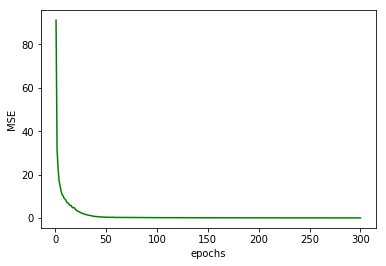

In [95]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
listaloss = []
                
for i in range(300):
    listaloss.append(hist.history['loss'][i])

plt.gcf().clear() #limpia lo dibujado previamente en pl
plt.plot(range(301)[1:],listaloss,'g',label='loss')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.show()


## (d) repetir (c) pero con relu

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  """


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 273.5475 - val_loss: 28.7759
Epoch 2/300
379/379 [==============================] - 0s - loss: 14.1839 - val_loss: 15.4016
Epoch 3/300
379/379 [==============================] - 0s - loss: 6.8801 - val_loss: 8.3651
Epoch 4/300
379/379 [==============================] - 0s - loss: 4.4675 - val_loss: 4.7570
Epoch 5/300
379/379 [==============================] - 0s - loss: 2.6556 - val_loss: 2.7604
Epoch 6/300
379/379 [==============================] - 0s - loss: 1.8294 - val_loss: 2.0876
Epoch 7/300
379/379 [==============================] - 0s - loss: 1.4138 - val_loss: 1.6896
Epoch 8/300
379/379 [==============================] - 0s - loss: 1.4723 - val_loss: 1.5221
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.9910 - val_loss: 1.5134
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.8109 - val_loss: 1.0665
Epoch 11/300
379/379 [======

379/379 [==============================] - 0s - loss: 0.0496 - val_loss: 0.3182
Epoch 89/300
379/379 [==============================] - 0s - loss: 0.0350 - val_loss: 0.2644
Epoch 90/300
379/379 [==============================] - 0s - loss: 0.0582 - val_loss: 0.3174
Epoch 91/300
379/379 [==============================] - 0s - loss: 0.0334 - val_loss: 0.3904
Epoch 92/300
379/379 [==============================] - 0s - loss: 0.0352 - val_loss: 0.3769
Epoch 93/300
379/379 [==============================] - 0s - loss: 0.0526 - val_loss: 0.2898
Epoch 94/300
379/379 [==============================] - 0s - loss: 0.0401 - val_loss: 0.1576
Epoch 95/300
379/379 [==============================] - 0s - loss: 0.0341 - val_loss: 0.2606
Epoch 96/300
379/379 [==============================] - ETA: 0s - loss: 0.028 - 0s - loss: 0.0472 - val_loss: 0.5152
Epoch 97/300
379/379 [==============================] - 0s - loss: 0.1219 - val_loss: 0.3647
Epoch 98/300
379/379 [==============================] - 0s 

379/379 [==============================] - 0s - loss: 0.0123 - val_loss: 0.3036
Epoch 175/300
379/379 [==============================] - 0s - loss: 0.0701 - val_loss: 0.6033
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.1819 - val_loss: 0.5662
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.1744 - val_loss: 0.2762
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.0138 - val_loss: 0.2176
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.0158 - val_loss: 0.3495
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.0560 - val_loss: 0.3392
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.0221 - val_loss: 0.1826
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.0424 - val_loss: 0.1719
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.0128 - val_loss: 0.2163
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.0105

379/379 [==============================] - 0s - loss: 0.0177 - val_loss: 0.1489
Epoch 261/300
379/379 [==============================] - 0s - loss: 0.0168 - val_loss: 0.2332
Epoch 262/300
379/379 [==============================] - 0s - loss: 0.0115 - val_loss: 0.1542
Epoch 263/300
379/379 [==============================] - 0s - loss: 0.0178 - val_loss: 0.1618
Epoch 264/300
379/379 [==============================] - 0s - loss: 0.0143 - val_loss: 0.1641
Epoch 265/300
379/379 [==============================] - 0s - loss: 0.0061 - val_loss: 0.2171
Epoch 266/300
379/379 [==============================] - 0s - loss: 0.0072 - val_loss: 0.2148
Epoch 267/300
379/379 [==============================] - 0s - loss: 0.0082 - val_loss: 0.2722
Epoch 268/300
379/379 [==============================] - 0s - loss: 0.0429 - val_loss: 0.2387
Epoch 269/300
379/379 [==============================] - 0s - loss: 0.0094 - val_loss: 0.1673
Epoch 270/300
379/379 [==============================] - 0s - loss: 0.0305

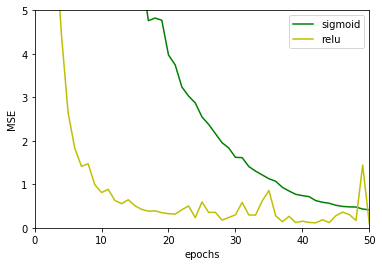

In [96]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


listaloss2 = []
                
for i in range(300):
    listaloss2.append(hist.history['loss'][i])

plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
plt.plot(range(301)[1:],listaloss2,'y',label='relu')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='uper right')
plt.axis([0,50,0,5])
plt.show()


## (e) repetir (c) y (d) variando tasa de aprendizaje

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  # Remove the CWD from sys.path while we load stuff.
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 2/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 3/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 4/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 5/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 6/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 7/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 8/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 9/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 10/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 58

379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 85/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 86/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 87/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 88/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 89/300
379/379 [==============================] - ETA: 0s - loss: 486.742 - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 90/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 91/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 92/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 93/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 94/300
379/

379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 168/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 169/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 170/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 171/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 172/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 173/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 174/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 175/300
379/379 [==============================] - ETA: 0s - loss: 564.835 - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 176/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 17

379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 251/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 252/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 253/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 254/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 255/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 256/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 257/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 258/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 259/300
379/379 [==============================] - 0s - loss: 599.9999 - val_loss: 582.7373
Epoch 260/300
379/379 [===========

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 2/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 3/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 4/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 5/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 6/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 7/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 8/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 9/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 10/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 58

379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 85/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 86/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 87/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 88/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 89/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 90/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 91/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 92/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 93/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 94/300
379/379 [=====================

379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 168/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 169/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 170/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 171/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 172/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 173/300
379/379 [==============================] - ETA: 0s - loss: 539.204 - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 174/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 175/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 176/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 17

379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 250/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 251/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 252/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 253/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 254/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 255/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 256/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 257/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 258/300
379/379 [==============================] - 0s - loss: 597.6337 - val_loss: 580.3853
Epoch 259/300
379/379 [===========

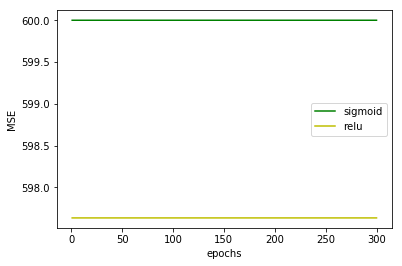

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 139381034605938.5156 - val_loss: 24798794154037668.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: 87755885444867683287826432.0000 - val_loss: 13436891409215110094434336768.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf                    
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

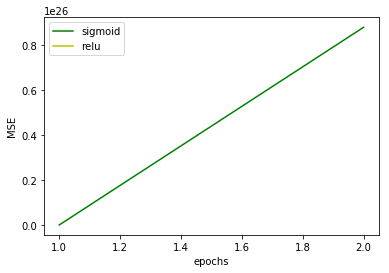

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 6745310881570823864320.0000 - val_loss: 7915895272283912800305152.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [====

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

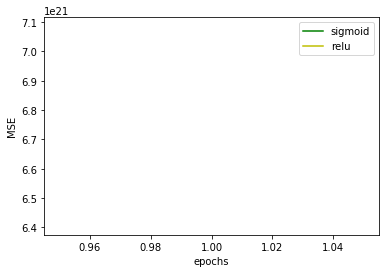

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 8033630055603320207179776.0000 - val_loss: 22700718788433008613484658688.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                    
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
37

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

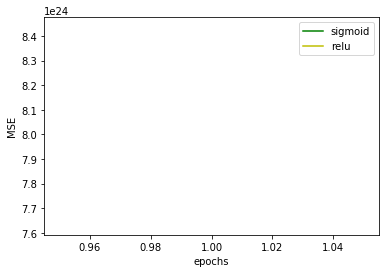

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1270632853299992339000860868608.0000 - val_loss: 11502868896553754226307468061835264.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                          
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: n

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

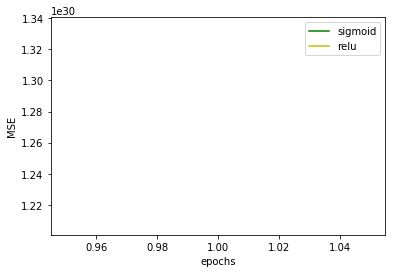

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 8222787978868537745703892410171392.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [===

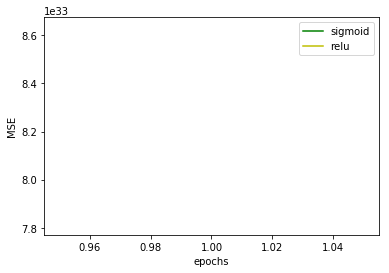

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 139740607848728175466656241513660416.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] -

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

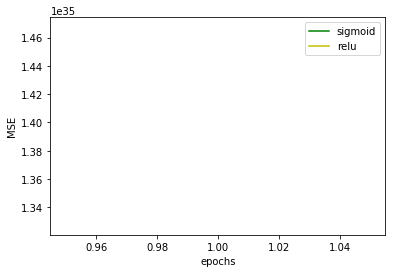

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 50610468658668849317727663963504640.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

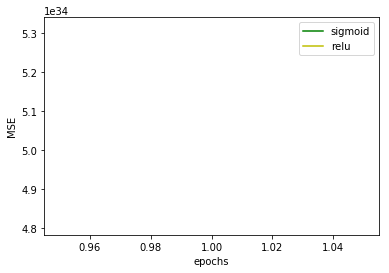

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 128015101944504107663360.0000 - val_loss: 225880578722509982560944128.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                  
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=========

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

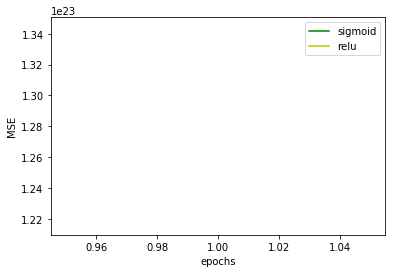

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 19053559238955274847911936.0000 - val_loss: 279152932350615307091737313280.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 278/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [=======================

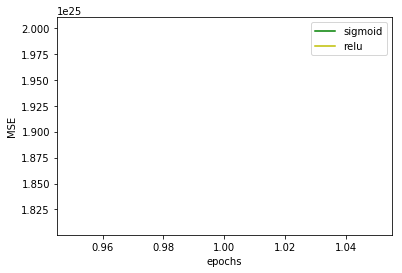

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 525451215241442834100571272617394176.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] -

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=========

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 278/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

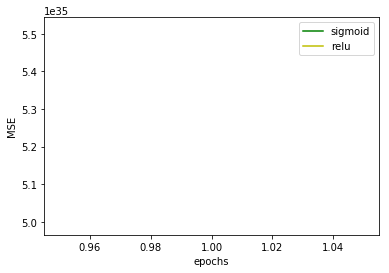

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

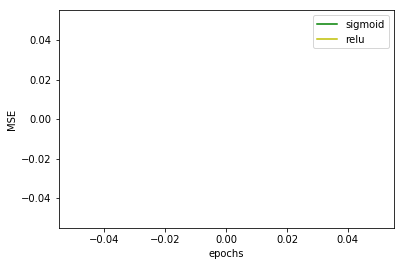

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1355575443117929668964569761972224.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

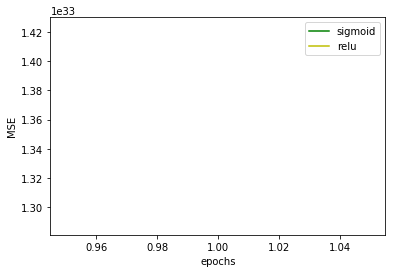

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1651455858021675827200.0000 - val_loss: 6769164189055489245446144.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [====

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [===

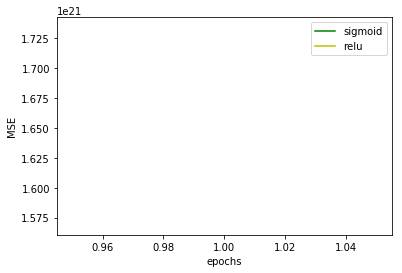

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

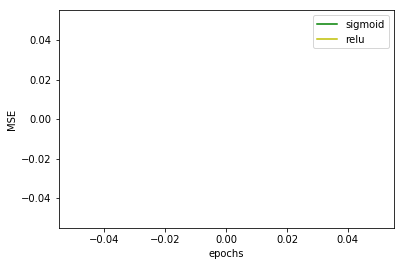

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [=======================

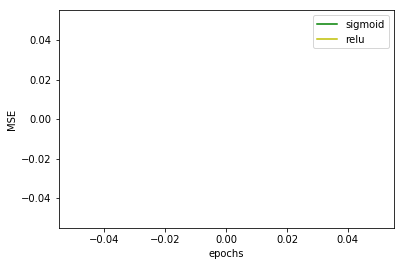

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 81821321337153971527090176.0000 - val_loss: 486294039204802875667161022464.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [===

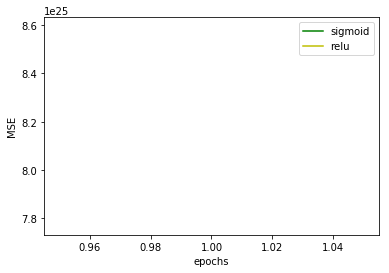

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 12203110394350158426781460260192256.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 163/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [=======================

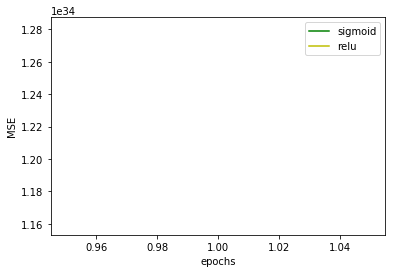

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 291/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 84/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 177/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 270/300
379/379 [=======================

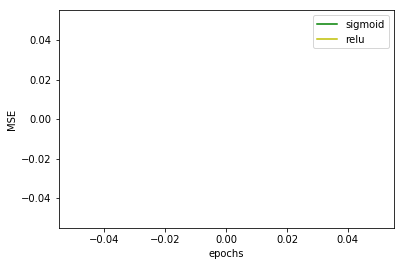

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 77254574942783006450127081192816640.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=========

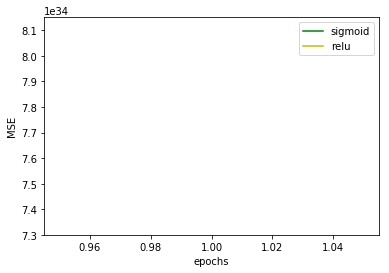

In [97]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)


for lr in lear_rate:
    
    #sigmoid
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=lr)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
    verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
    listaloss = []
                
    for i in range(300):
        listaloss.append(hist.history['loss'][i])

    
    
    
    
    #relu
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=lr)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


    listaloss2 = []
                
    for i in range(300):
        listaloss2.append(hist.history['loss'][i])

    plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
    plt.plot(range(301)[1:],listaloss2,'y',label='relu')
    plt.ylabel('MSE')
    plt.xlabel('epochs')
    plt.legend(loc='uper right')
    plt.show()




## (f)


In [98]:
from sklearn import cross_validation

#relu
Xm = X_train_scaled.as_matrix()
ym = y_train.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    
    model = Sequential()

    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)


#sigmoid
Xm = X_train_scaled.as_matrix()
ym = y_train.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    
    model = Sequential()

    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)


/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  del sys.path[0]
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/300
341/341 [==============================] - 0s - loss: nan          
Epoch 2/300
341/341 [==============================] - 0s - loss: nan     
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341

341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: nan     
Epoch 226/300

341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - 

341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300

341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - loss: nan     
Epoch 45/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300

341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300
341/341 [==============================] - 0s - loss: nan     
Epoch 257/300

341/341 [==============================] - 0s - loss: nan     
Epoch 51/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 52/300
341/341 [==============================] - 0s - loss: nan     
Epoch 53/300
341/341 [==============================] - 0s - loss: nan     
Epoch 54/300
341/341 [==============================] - 0s - loss: nan     
Epoch 55/300
341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - loss: nan     
Epoch 60/300
341/341 [==============================] - 0s - loss: nan     
Epoch 61/300
341/341 [==============================] - 0s - loss: nan     
Epoch 62/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 157/300
341/341 [==============================] - 0s - loss: nan     
Epoch 158/300
341/341 [==============================] - 0s - loss: nan     
Epoch 159/300
341/341 [==============================] - 0s - loss: nan     
Epoch 160/300
341/341 [==============================] - 0s - loss: nan     
Epoch 161/300
341/341 [==============================] - 0s - loss: nan     
Epoch 162/300
341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300
341/341 [==============================] - 0s - loss: nan     
Epoch 166/300
341/341 [==============================] - 0s - loss: nan     
Epoch 167/300
341/341 [==============================] - 0s - loss: nan     
Epoch 168/300
341/341 [==============================] - 0s - loss: nan     
Epoch 169/300

341/341 [==============================] - 0s - loss: nan     
Epoch 263/300
341/341 [==============================] - 0s - loss: nan     
Epoch 264/300
341/341 [==============================] - 0s - loss: nan     
Epoch 265/300
341/341 [==============================] - 0s - loss: nan     
Epoch 266/300
341/341 [==============================] - 0s - loss: nan     
Epoch 267/300
341/341 [==============================] - 0s - loss: nan     
Epoch 268/300
341/341 [==============================] - 0s - loss: nan     
Epoch 269/300
341/341 [==============================] - 0s - loss: nan     
Epoch 270/300
341/341 [==============================] - 0s - loss: nan     
Epoch 271/300
341/341 [==============================] - 0s - loss: nan     
Epoch 272/300
341/341 [==============================] - 0s - loss: nan     
Epoch 273/300
341/341 [==============================] - 0s - loss: nan     
Epoch 274/300
341/341 [==============================] - 0s - loss: nan     
Epoch 275/300

341/341 [==============================] - 0s - loss: nan     
Epoch 69/300
341/341 [==============================] - 0s - loss: nan     
Epoch 70/300
341/341 [==============================] - 0s - loss: nan     
Epoch 71/300
341/341 [==============================] - 0s - loss: nan     
Epoch 72/300
341/341 [==============================] - 0s - loss: nan     
Epoch 73/300
341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [==============================] - 0s - loss: nan     
Epoch 77/300
341/341 [==============================] - 0s - loss: nan     
Epoch 78/300
341/341 [==============================] - 0s - loss: nan     
Epoch 79/300
341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 175/300
341/341 [==============================] - 0s - loss: nan     
Epoch 176/300
341/341 [==============================] - 0s - loss: nan     
Epoch 177/300
341/341 [==============================] - 0s - loss: nan     
Epoch 178/300
341/341 [==============================] - 0s - loss: nan     
Epoch 179/300
341/341 [==============================] - 0s - loss: nan     
Epoch 180/300
341/341 [==============================] - 0s - loss: nan     
Epoch 181/300
341/341 [==============================] - 0s - loss: nan     
Epoch 182/300
341/341 [==============================] - 0s - loss: nan     
Epoch 183/300
341/341 [==============================] - 0s - loss: nan     
Epoch 184/300
341/341 [==============================] - 0s - loss: nan     
Epoch 185/300
341/341 [==============================] - 0s - loss: nan     
Epoch 186/300
341/341 [==============================] - 0s - loss: nan     
Epoch 187/300

341/341 [==============================] - 0s - loss: nan     
Epoch 280/300
341/341 [==============================] - 0s - loss: nan     
Epoch 281/300
341/341 [==============================] - 0s - loss: nan     
Epoch 282/300
341/341 [==============================] - 0s - loss: nan     
Epoch 283/300
341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300
341/341 [==============================] - 0s - loss: nan     
Epoch 288/300
341/341 [==============================] - 0s - loss: nan     
Epoch 289/300
341/341 [==============================] - 0s - loss: nan     
Epoch 290/300
341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300

341/341 [==============================] - 0s - loss: nan     
Epoch 86/300
341/341 [==============================] - 0s - loss: nan     
Epoch 87/300
341/341 [==============================] - 0s - loss: nan     
Epoch 88/300
341/341 [==============================] - 0s - loss: nan     
Epoch 89/300
341/341 [==============================] - 0s - loss: nan     
Epoch 90/300
341/341 [==============================] - 0s - loss: nan     
Epoch 91/300
341/341 [==============================] - 0s - loss: nan     
Epoch 92/300
341/341 [==============================] - 0s - loss: nan     
Epoch 93/300
341/341 [==============================] - 0s - loss: nan     
Epoch 94/300
341/341 [==============================] - 0s - loss: nan     
Epoch 95/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 96/300
341/341 [==============================] - 0s - loss: nan     
Epoch 97/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 192/300
341/341 [==============================] - 0s - loss: nan     
Epoch 193/300
341/341 [==============================] - 0s - loss: nan     
Epoch 194/300
341/341 [==============================] - 0s - loss: nan     
Epoch 195/300
341/341 [==============================] - 0s - loss: nan     
Epoch 196/300
341/341 [==============================] - 0s - loss: nan     
Epoch 197/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 198/300
341/341 [==============================] - 0s - loss: nan     
Epoch 199/300
341/341 [==============================] - 0s - loss: nan     
Epoch 200/300
341/341 [==============================] - 0s - loss: nan     
Epoch 201/300
341/341 [==============================] - 0s - loss: nan     
Epoch 202/300
341/341 [==============================] - 0s - loss: nan     
Epoch 203/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 297/300
341/341 [==============================] - 0s - loss: nan     
Epoch 298/300
341/341 [==============================] - 0s - loss: nan     
Epoch 299/300
341/341 [==============================] - 0s - loss: nan     
Epoch 300/300
341/341 [==============================] - 0s - loss: nan          
Epoch 2/300
341/341 [==============================] - 0s - loss: nan     
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==

341/341 [==============================] - 0s - loss: nan     
Epoch 104/300
341/341 [==============================] - 0s - loss: nan     
Epoch 105/300
341/341 [==============================] - 0s - loss: nan     
Epoch 106/300
341/341 [==============================] - 0s - loss: nan     
Epoch 107/300
341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 210/300
341/341 [==============================] - 0s - loss: nan     
Epoch 211/300
341/341 [==============================] - 0s - loss: nan     
Epoch 212/300
341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300

341/341 [==============================] - 0s - loss: nan     
Epoch 15/300
341/341 [==============================] - 0s - loss: nan     
Epoch 16/300
341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 122/300
341/341 [==============================] - 0s - loss: nan     
Epoch 123/300
341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300

341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300

341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [==============================] - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [===================

341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300

341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: na

342/342 [==============================] - 0s - loss: nan     
Epoch 50/300
342/342 [==============================] - 0s - loss: nan     
Epoch 51/300
342/342 [==============================] - 0s - loss: nan     
Epoch 52/300
342/342 [==============================] - 0s - loss: nan     
Epoch 53/300
342/342 [==============================] - 0s - loss: nan     
Epoch 54/300
342/342 [==============================] - 0s - loss: nan     
Epoch 55/300
342/342 [==============================] - 0s - loss: nan     
Epoch 56/300
342/342 [==============================] - 0s - loss: nan     
Epoch 57/300
342/342 [==============================] - 0s - loss: nan     
Epoch 58/300
342/342 [==============================] - 0s - loss: nan     
Epoch 59/300
342/342 [==============================] - 0s - loss: nan     
Epoch 60/300
342/342 [==============================] - 0s - loss: nan     
Epoch 61/300
342/342 [==============================] - 0s - loss: nan     
Epoch 62/300
342/342 [===

342/342 [==============================] - 0s - loss: nan     
Epoch 157/300
342/342 [==============================] - 0s - loss: nan     
Epoch 158/300
342/342 [==============================] - 0s - loss: nan     
Epoch 159/300
342/342 [==============================] - 0s - loss: nan     
Epoch 160/300
342/342 [==============================] - 0s - loss: nan     
Epoch 161/300
342/342 [==============================] - 0s - loss: nan     
Epoch 162/300
342/342 [==============================] - 0s - loss: nan     
Epoch 163/300
342/342 [==============================] - 0s - loss: nan     
Epoch 164/300
342/342 [==============================] - 0s - loss: nan     
Epoch 165/300
342/342 [==============================] - 0s - loss: nan     
Epoch 166/300
342/342 [==============================] - 0s - loss: nan     
Epoch 167/300
342/342 [==============================] - 0s - loss: nan     
Epoch 168/300
342/342 [==============================] - 0s - loss: nan     
Epoch 169/300

342/342 [==============================] - 0s - loss: nan     
Epoch 263/300
342/342 [==============================] - 0s - loss: nan     
Epoch 264/300
342/342 [==============================] - 0s - loss: nan     
Epoch 265/300
342/342 [==============================] - 0s - loss: nan     
Epoch 266/300
342/342 [==============================] - 0s - loss: nan     
Epoch 267/300
342/342 [==============================] - 0s - loss: nan     
Epoch 268/300
342/342 [==============================] - 0s - loss: nan     
Epoch 269/300
342/342 [==============================] - 0s - loss: nan     
Epoch 270/300
342/342 [==============================] - 0s - loss: nan     
Epoch 271/300
342/342 [==============================] - 0s - loss: nan     
Epoch 272/300
342/342 [==============================] - 0s - loss: nan     
Epoch 273/300
342/342 [==============================] - 0s - loss: nan     
Epoch 274/300
342/342 [==============================] - 0s - loss: nan     
Epoch 275/300

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Epoch 1/300
341/341 [==============================] - 0s - loss: 727594147552402113022346133504.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                          
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [===========

341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300

341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: nan     
Epoch 137/300

341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300

341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - loss: nan     
Epoch 45/300
341/341 [==============================] - 0s - loss: nan     
Epoch 46/300
341/341 [==============================] - 0s - loss: nan     
Epoch 47/300
341/341 [==============================] - 0s - loss: nan     
Epoch 48/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: nan     
Epoch 154/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300
341/341 [==============================] - 0s - loss: nan     
Epoch 257/300
341/341 [==============================] - 0s - loss: nan     
Epoch 258/300
341/341 [==============================] - 0s - loss: nan     
Epoch 259/300
341/341 [==============================] - 0s - loss: nan     
Epoch 260/300
341/341 [==============================] - 0s - loss: nan     
Epoch 261/300

Epoch 54/300
341/341 [==============================] - 0s - loss: nan     
Epoch 55/300
341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - loss: nan     
Epoch 60/300
341/341 [==============================] - 0s - loss: nan     
Epoch 61/300
341/341 [==============================] - 0s - loss: nan     
Epoch 62/300
341/341 [==============================] - 0s - loss: nan     
Epoch 63/300
341/341 [==============================] - 0s - loss: nan     
Epoch 64/300
341/341 [==============================] - 0s - loss: nan     
Epoch 65/300
341/341 [==============================] - 0s - loss: nan     
Epoch 66/300
341/341 [==============================] - 0s - loss: nan     
Epoch 67/300

341/341 [==============================] - 0s - loss: nan     
Epoch 160/300
341/341 [==============================] - 0s - loss: nan     
Epoch 161/300
341/341 [==============================] - 0s - loss: nan     
Epoch 162/300
341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300
341/341 [==============================] - 0s - loss: nan     
Epoch 166/300
341/341 [==============================] - 0s - loss: nan     
Epoch 167/300
341/341 [==============================] - 0s - loss: nan     
Epoch 168/300
341/341 [==============================] - 0s - loss: nan     
Epoch 169/300
341/341 [==============================] - 0s - loss: nan     
Epoch 170/300
341/341 [==============================] - 0s - loss: nan     
Epoch 171/300
341/341 [==============================] - 0s - loss: nan     
Epoch 172/300

341/341 [==============================] - 0s - loss: nan     
Epoch 265/300
341/341 [==============================] - 0s - loss: nan     
Epoch 266/300
341/341 [==============================] - 0s - loss: nan     
Epoch 267/300
341/341 [==============================] - 0s - loss: nan     
Epoch 268/300
341/341 [==============================] - 0s - loss: nan     
Epoch 269/300
341/341 [==============================] - 0s - loss: nan     
Epoch 270/300
341/341 [==============================] - 0s - loss: nan     
Epoch 271/300
341/341 [==============================] - 0s - loss: nan     
Epoch 272/300
341/341 [==============================] - 0s - loss: nan     
Epoch 273/300
341/341 [==============================] - 0s - loss: nan     
Epoch 274/300
341/341 [==============================] - 0s - loss: nan     
Epoch 275/300
341/341 [==============================] - 0s - loss: nan     
Epoch 276/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 70/300
341/341 [==============================] - 0s - loss: nan     
Epoch 71/300
341/341 [==============================] - 0s - loss: nan     
Epoch 72/300
341/341 [==============================] - 0s - loss: nan     
Epoch 73/300
341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [==============================] - 0s - loss: nan     
Epoch 77/300
341/341 [==============================] - 0s - loss: nan     
Epoch 78/300
341/341 [==============================] - 0s - loss: nan     
Epoch 79/300
341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [==============================] - 0s - loss: nan     
Epoch 82/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 176/300
341/341 [==============================] - 0s - loss: nan     
Epoch 177/300
341/341 [==============================] - 0s - loss: nan     
Epoch 178/300
341/341 [==============================] - 0s - loss: nan     
Epoch 179/300
341/341 [==============================] - 0s - loss: nan     
Epoch 180/300
341/341 [==============================] - 0s - loss: nan     
Epoch 181/300
341/341 [==============================] - 0s - loss: nan     
Epoch 182/300
341/341 [==============================] - 0s - loss: nan     
Epoch 183/300
341/341 [==============================] - 0s - loss: nan     
Epoch 184/300
341/341 [==============================] - 0s - loss: nan     
Epoch 185/300
341/341 [==============================] - 0s - loss: nan     
Epoch 186/300
341/341 [==============================] - 0s - loss: nan     
Epoch 187/300
341/341 [==============================] - 0s - loss: nan     
Epoch 188/300

341/341 [==============================] - 0s - loss: nan     
Epoch 282/300
341/341 [==============================] - 0s - loss: nan     
Epoch 283/300
341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 288/300
341/341 [==============================] - 0s - loss: nan     
Epoch 289/300
341/341 [==============================] - 0s - loss: nan     
Epoch 290/300
341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300
341/341 [==============================] - 0s - loss: nan     
Epoch 293/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 86/300
341/341 [==============================] - 0s - loss: nan     
Epoch 87/300
341/341 [==============================] - 0s - loss: nan     
Epoch 88/300
341/341 [==============================] - 0s - loss: nan     
Epoch 89/300
341/341 [==============================] - 0s - loss: nan     
Epoch 90/300
341/341 [==============================] - 0s - loss: nan     
Epoch 91/300
341/341 [==============================] - 0s - loss: nan     
Epoch 92/300
341/341 [==============================] - 0s - loss: nan     
Epoch 93/300
341/341 [==============================] - 0s - loss: nan     
Epoch 94/300
341/341 [==============================] - 0s - loss: nan     
Epoch 95/300
341/341 [==============================] - 0s - loss: nan     
Epoch 96/300
341/341 [==============================] - 0s - loss: nan     
Epoch 97/300
341/341 [==============================] - 0s - loss: nan     
Epoch 98/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 191/300
341/341 [==============================] - 0s - loss: nan     
Epoch 192/300
341/341 [==============================] - 0s - loss: nan     
Epoch 193/300
341/341 [==============================] - 0s - loss: nan     
Epoch 194/300
341/341 [==============================] - 0s - loss: nan     
Epoch 195/300
341/341 [==============================] - 0s - loss: nan     
Epoch 196/300
341/341 [==============================] - 0s - loss: nan     
Epoch 197/300
341/341 [==============================] - 0s - loss: nan     
Epoch 198/300
341/341 [==============================] - 0s - loss: nan     
Epoch 199/300
341/341 [==============================] - 0s - loss: nan     
Epoch 200/300
341/341 [==============================] - 0s - loss: nan     
Epoch 201/300
341/341 [==============================] - 0s - loss: nan     
Epoch 202/300
341/341 [==============================] - 0s - loss: nan     
Epoch 203/300

341/341 [==============================] - 0s - loss: nan     
Epoch 296/300
341/341 [==============================] - 0s - loss: nan     
Epoch 297/300
341/341 [==============================] - 0s - loss: nan     
Epoch 298/300
341/341 [==============================] - 0s - loss: nan     
Epoch 299/300
341/341 [==============================] - 0s - loss: nan     
Epoch 300/300
341/341 [==============================] - 0s - loss: 287039192051744650559488.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                   
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================

341/341 [==============================] - 0s - loss: nan     
Epoch 101/300
341/341 [==============================] - 0s - loss: nan     
Epoch 102/300
341/341 [==============================] - 0s - loss: nan     
Epoch 103/300
341/341 [==============================] - 0s - loss: nan     
Epoch 104/300
341/341 [==============================] - 0s - loss: nan     
Epoch 105/300
341/341 [==============================] - 0s - loss: nan     
Epoch 106/300
341/341 [==============================] - 0s - loss: nan     
Epoch 107/300
341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 207/300
341/341 [==============================] - 0s - loss: nan     
Epoch 208/300
341/341 [==============================] - 0s - loss: nan     
Epoch 209/300
341/341 [==============================] - 0s - loss: nan     
Epoch 210/300
341/341 [==============================] - 0s - loss: nan     
Epoch 211/300
341/341 [==============================] - 0s - loss: nan     
Epoch 212/300
341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300

341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341/341 [==============================] - 0s - loss: nan     
Epoch 15/300
341/341 [==============================] - 0s - loss: nan     
Epoch 16/300
341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [==============================] - 0s - loss: nan     
Epoch 121/300
341/341 [==============================] - 0s - loss: nan     
Epoch 122/300
341/341 [==============================] - 0s - loss: nan     
Epoch 123/300
341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 130/300
341/341 [===========================

341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: nan     
Epoch 226/300
341/341 [==============================] - 0s - loss: nan     
Epoch 227/300
341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300

341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - loss: nan     
Epoch 31/300
341/341 [==============================] - 0s - loss: nan     
Epoch 32/300
341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [==============================] - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300

341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300
341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300

Epoch 44/300
342/342 [==============================] - 0s - loss: nan     
Epoch 45/300
342/342 [==============================] - 0s - loss: nan     
Epoch 46/300
342/342 [==============================] - 0s - loss: nan     
Epoch 47/300
342/342 [==============================] - 0s - loss: nan     
Epoch 48/300
342/342 [==============================] - 0s - loss: nan     
Epoch 49/300
342/342 [==============================] - 0s - loss: nan     
Epoch 50/300
342/342 [==============================] - 0s - loss: nan     
Epoch 51/300
342/342 [==============================] - 0s - loss: nan     
Epoch 52/300
342/342 [==============================] - 0s - loss: nan     
Epoch 53/300
342/342 [==============================] - 0s - loss: nan     
Epoch 54/300
342/342 [==============================] - 0s - loss: nan     
Epoch 55/300
342/342 [==============================] - 0s - loss: nan     
Epoch 56/300
342/342 [==============================] - ETA: 0s - loss: n - 0s - loss: n

342/342 [==============================] - 0s - loss: nan     
Epoch 150/300
342/342 [==============================] - 0s - loss: nan     
Epoch 151/300
342/342 [==============================] - 0s - loss: nan     
Epoch 152/300
342/342 [==============================] - 0s - loss: nan     
Epoch 153/300
342/342 [==============================] - 0s - loss: nan     
Epoch 154/300
342/342 [==============================] - 0s - loss: nan     
Epoch 155/300
342/342 [==============================] - 0s - loss: nan     
Epoch 156/300
342/342 [==============================] - 0s - loss: nan     
Epoch 157/300
342/342 [==============================] - 0s - loss: nan     
Epoch 158/300
342/342 [==============================] - 0s - loss: nan     
Epoch 159/300
342/342 [==============================] - 0s - loss: nan     
Epoch 160/300
342/342 [==============================] - 0s - loss: nan     
Epoch 161/300
342/342 [==============================] - 0s - loss: nan     
Epoch 162/300

342/342 [==============================] - 0s - loss: nan     
Epoch 256/300
342/342 [==============================] - 0s - loss: nan     
Epoch 257/300
342/342 [==============================] - 0s - loss: nan     
Epoch 258/300
342/342 [==============================] - 0s - loss: nan     
Epoch 259/300
342/342 [==============================] - 0s - loss: nan     
Epoch 260/300
342/342 [==============================] - 0s - loss: nan     
Epoch 261/300
342/342 [==============================] - 0s - loss: nan     
Epoch 262/300
342/342 [==============================] - 0s - loss: nan     
Epoch 263/300
342/342 [==============================] - 0s - loss: nan     
Epoch 264/300
342/342 [==============================] - 0s - loss: nan     
Epoch 265/300
342/342 [==============================] - 0s - loss: nan     
Epoch 266/300
342/342 [==============================] - 0s - loss: nan     
Epoch 267/300
342/342 [==============================] - 0s - loss: nan     
Epoch 268/300

## (g)

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2696928040438733312.0000 - val_loss: 7778766684198494273536.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan             
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
37

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

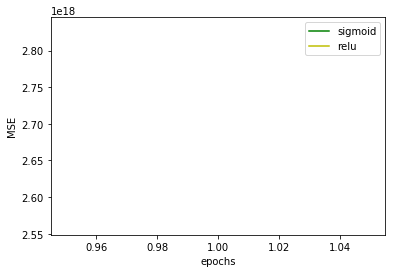

In [99]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)


#sigmoid
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
listaloss = []

for i in range(300):
    listaloss.append(hist.history['loss'][i])





#relu
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


listaloss2 = []

for i in range(300):
    listaloss2.append(hist.history['loss'][i])

plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
plt.plot(range(301)[1:],listaloss2,'y',label='relu')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='uper right')
plt.show()









## (h)

In [100]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)
sgd = SGD(lr=0.2,momentum=0.9)

## (i)

In [101]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,nb_epoch=300)

Epoch 1/300
379/379 [==============================] - 0s - loss: nan     
Epoch 2/300
379/379 [==============================] - 0s - loss: nan     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan     
Epoch 4/300
379/379 [==============================] - 0s - loss: nan     
Epoch 5/300
379/379 [==============================] - 0s - loss: nan     
Epoch 6/300
379/379 [==============================] - 0s - loss: nan     
Epoch 7/300
379/379 [==============================] - 0s - loss: nan     
Epoch 8/300
379/379 [==============================] - 0s - loss: nan     
Epoch 9/300
379/379 [==============================] - 0s - loss: nan     
Epoch 10/300
379/379 [==============================] - 0s - loss: nan     
Epoch 11/300
379/379 [==============================] - 0s - loss: nan     
Epoch 12/300
379/379 [==============================] - 0s - loss: nan     
Epoch 13/300
379/379 [==============================] - 0s - loss: nan     
Epoch 14/300
379/379 

379/379 [==============================] - 0s - loss: nan     
Epoch 109/300
379/379 [==============================] - 0s - loss: nan     
Epoch 110/300
379/379 [==============================] - 0s - loss: nan     
Epoch 111/300
379/379 [==============================] - 0s - loss: nan     
Epoch 112/300
379/379 [==============================] - 0s - loss: nan     
Epoch 113/300
379/379 [==============================] - 0s - loss: nan     
Epoch 114/300
379/379 [==============================] - 0s - loss: nan     
Epoch 115/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 116/300
379/379 [==============================] - 0s - loss: nan     
Epoch 117/300
379/379 [==============================] - 0s - loss: nan     
Epoch 118/300
379/379 [==============================] - 0s - loss: nan     
Epoch 119/300
379/379 [==============================] - 0s - loss: nan     
Epoch 120/300
379/379 [==============================] - 0s - loss: na

379/379 [==============================] - 0s - loss: nan     
Epoch 215/300
379/379 [==============================] - 0s - loss: nan     
Epoch 216/300
379/379 [==============================] - 0s - loss: nan     
Epoch 217/300
379/379 [==============================] - 0s - loss: nan     
Epoch 218/300
379/379 [==============================] - 0s - loss: nan     
Epoch 219/300
379/379 [==============================] - 0s - loss: nan     
Epoch 220/300
379/379 [==============================] - 0s - loss: nan     
Epoch 221/300
379/379 [==============================] - 0s - loss: nan     
Epoch 222/300
379/379 [==============================] - 0s - loss: nan     
Epoch 223/300
379/379 [==============================] - 0s - loss: nan     
Epoch 224/300
379/379 [==============================] - 0s - loss: nan     
Epoch 225/300
379/379 [==============================] - 0s - loss: nan     
Epoch 226/300
379/379 [==============================] - 0s - loss: nan     
Epoch 227/300

## (j)

In [102]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix())

TypeError: compile() takes at least 3 arguments (2 given)

## (k)

In [ ]:
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

## (l)

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

## (m)